In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [3]:
# Load ECG dataset
data = pd.read_csv('ecg.csv', header=None)
# Convert to numpy array
ecg_data = data.values

# Normalize the data
scaler = StandardScaler()
ecg_data_scaled = scaler.fit_transform(ecg_data)


In [4]:
# Define Encoder
input_dim = ecg_data_scaled.shape[1]
encoding_dim = 14  # Latent space representation

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)


In [5]:
# Define Decoder
decoder = Dense(input_dim, activation='sigmoid')(encoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)


In [6]:
# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])


In [7]:
# Train the autoencoder
history = autoencoder.fit(ecg_data_scaled, ecg_data_scaled, 
                          epochs=50, 
                          batch_size=32, 
                          validation_split=0.2, 
                          shuffle=True)


Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0083 - loss: 1.1247 - val_accuracy: 0.0070 - val_loss: 0.9197
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0252 - loss: 0.7340 - val_accuracy: 0.0210 - val_loss: 0.8026
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0529 - loss: 0.7214 - val_accuracy: 0.0310 - val_loss: 0.7753
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0660 - loss: 0.6963 - val_accuracy: 0.0350 - val_loss: 0.7652
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0845 - loss: 0.6640 - val_accuracy: 0.0420 - val_loss: 0.7584
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1053 - loss: 0.6705 - val_accuracy: 0.0330 - val_loss: 0.7526
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1079 - loss: 0.6788 - val_accuracy: 0.0340 - val_loss: 0.7518
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1111 - loss: 0.6858 - val_accuracy: 0.

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


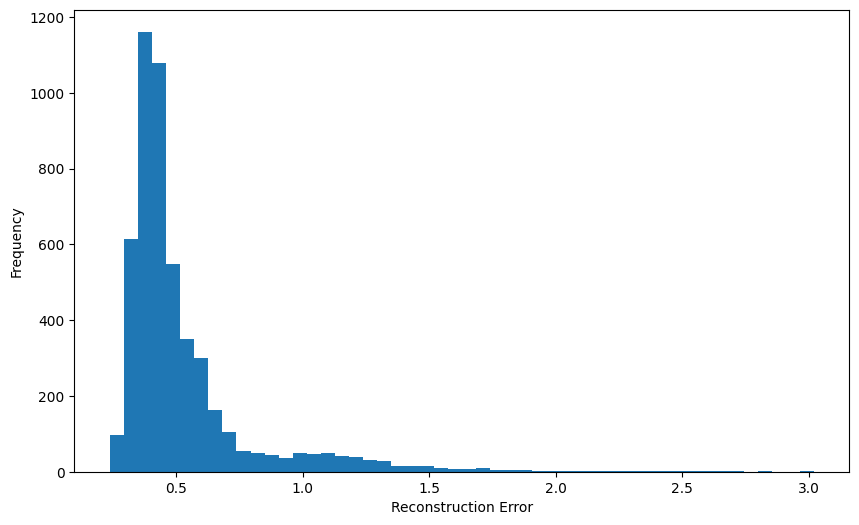

Number of anomalies detected: 292


In [8]:
# Get the reconstruction error
reconstructed_data = autoencoder.predict(ecg_data_scaled)
reconstruction_error = np.mean(np.abs(ecg_data_scaled - reconstructed_data), axis=1)

# Plot the reconstruction error
plt.figure(figsize=(10, 6))
plt.hist(reconstruction_error, bins=50)
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.show()

# Anomalies: If error is above a certain threshold, flag it as an anomaly
threshold = np.mean(reconstruction_error) + 2*np.std(reconstruction_error)
anomalies = reconstruction_error > threshold

print(f"Number of anomalies detected: {np.sum(anomalies)}")
